# Maximizing ROI: Data-Driven Strategies for Advertising Coding Subscriptions

# Table of Contents

1. [Introduction](#Introduction)  
2. [Data Loading and Memory Profiling](#Data-Loading-and-Memory-Profiling)  
3. [Data Cleaning and Preparation](#Data-Cleaning-and-Preparation)  
4. [Analysis of Interest in Mobile and Web Development Among New Coders](#Analysis-of-Interest-in-Mobile-and-Web-Development-Among-New-Coders)  
5. [Targeting the Best Countries for Advertising Coding Products](#Targeting-the-Best-Countries-for-Advertising-Coding-Products)  
6. [Analysis of Money Spent for Learning](#Analysis-of-Money-Spent-for-Learning)  
7. [Final Recommendations for Advertisement Strategy](#Final-Recommendations-for-Advertisement-Strategy)  
8. [Conclusion](#Conclusion)  

## Introduction

This analysis aims to identify the best countries to advertise a $59-per-month subscription for learning resources, focusing on optimizing advertising spend and maximizing returns. The study concentrates on four key markets: the United States, Canada, the United Kingdom, and India.

Using survey data from 2016–2021, the analysis examines monthly spending on learning resources and the distribution of potential customers across these countries. It seeks to understand the demographics, preferences, and spending behaviors of new coders, focusing on:  
- Where new coders are located.  
- Locations with the highest concentration of new coders.  
- How much they are willing to spend on learning.  
- The roles they are interested in pursuing.  

The results highlight the United States and Canada as the most promising markets due to high average monthly spending that exceeds the subscription price. While the UK and India show potential, their spending patterns suggest either lower profitability or the need for localized pricing strategies. Advertising efforts should prioritize the US and Canada for the highest returns.

---

## About the Dataset

The freeCodeCamp New Coder Surveys were conducted to understand the audience and improve offerings. These surveys capture responses from new coders across various countries, backgrounds, and career goals.  

The survey data is publicly available and can be accessed through [freeCodeCamp's GitHub repository](https://github.com/freeCodeCamp/2016-new-coder-survey) for 2016 and related repositories for subsequent years.  

## Data Loading and Memory Profiling

In [6]:
import pandas as pd
pd.set_option('display.max_rows', 50)

# Load the 2016 survey dataset and calculate its memory usage
raw_data_2016 = pd.read_csv('new_coders_survey_2016.csv', low_memory=False)
print('Memory usage of raw_data_2016:', raw_data_2016.memory_usage(deep=True).sum() / 1e6, "MB")

# Load the 2017 survey dataset and calculate its memory usage
raw_data_2017 = pd.read_csv('new_coders_survey_2017.csv', low_memory=False)
print('Memory usage of raw_data_2017:', raw_data_2017.memory_usage(deep=True).sum() / 1e6, "MB")

# Load the 2018 survey dataset and calculate its memory usage
raw_data_2018 = pd.read_csv('new_coders_survey_2018.csv', low_memory=False)
print('Memory usage of raw_data_2018:', raw_data_2018.memory_usage(deep=True).sum() / 1e6, "MB")

# Load the 2021 survey dataset and calculate its memory usage
raw_data_2021 = pd.read_csv('new_coders_survey_2021.csv', low_memory=False)
print('Memory usage of raw_data_2021:', raw_data_2021.memory_usage(deep=True).sum() / 1e6, "MB")

Memory usage of raw_data_2016: 33.997686 MB
Memory usage of raw_data_2017: 44.977253 MB
Memory usage of raw_data_2018: 66.764697 MB
Memory usage of raw_data_2021: 64.713905 MB


In [7]:
raw_data_2016.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [8]:
raw_data_2017.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
raw_data_2018.head()

,ID,is_software_dev,is_first_dev_job,months_job_search,job_pref,job_intr_fllstck,job_intr_backend,job_intr_frntend,job_intr_mobile,job_intr_devops,...,last_yr_income,communite_time,is_self_employed,has_served_military,is_recv_disab_bnft,has_high_spd_ntnet,time_start,time_end,network_id,time_total_sec
0,64e4170f7f25253d56019818b7e9fdc0,0.0,NaN,NaN,freelance,NaN,NaN,NaN,NaN,NaN,...,70000.0,15 to 29 minutes,0.0,0.0,0.0,1.0,2018-10-24T20:48:37Z,2018-10-24T20:55:53Z,4fc684f97d,436
1,bc030166e4c7f8cb045c28ee98d5a6cd,0.0,NaN,NaN,work for a medium-sized company,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,2018-10-24T19:55:23Z,2018-10-24T20:05:57Z,f2b0eef42a,634
2,d23d65229c00192bb5a48e73c558a0bb,0.0,NaN,NaN,work for a multinational corporation,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,2018-10-24T19:03:57Z,2018-10-24T19:14:08Z,b1cb01d6fd,611
3,c601014027aa378a84a8e4047cab50e3,0.0,NaN,NaN,freelance,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,1.0,2018-10-24T18:40:56Z,2018-10-24T18:48:54Z,f7878cd625,478
4,3a461a8244498a13964071d93ab977ea,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9000.0,30 to 44 minutes,0.0,0.0,0.0,1.0,2018-10-24T17:54:59Z,2018-10-24T18:03:42Z,94ae3fc502,523


In [10]:
raw_data_2021.head()

,Timestamp,1. What is your biggest reason for learning to code?,2. What methods have you used to learn about coding? Please select all that apply.,3. Which online learning resources have you found helpful? Please select all that apply.,"4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.","5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.","6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.",7. About how many hours do you spend learning each week?,8. About how many months have you been programming?,"9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?",...,45. Please tell us how satisfied you are with each of these following aspects of your present job [Job security],45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance],45. Please tell us how satisfied you are with each of these following aspects of your present job [Professional growth or leadership opportunities],45. Please tell us how satisfied you are with each of these following aspects of your present job [Workplace/company culture],45. Please tell us how satisfied you are with each of these following aspects of your present job [Diverse and inclusive work environment],45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload],46. About how many minutes does it take you to get to work each day?,47. Have you served in your country's military before?,48. Do you currently receive disability benefits from your government?,49. Do you have high speed internet at your home?
0,7/1/2021 10:10:23,To succeed in current career,"Online resources, Books, In-person bootcamps, ...","freeCodeCamp, Mozilla Developer Network (MDN),...","conferences, workshops, Meetup.com events",The Changelog,"CS Dojo, freeCodeCamp",4.0,120,NaN,...,Somewhat satisfied,Somewhat dissatisfied,I do not know,Somewhat satisfied,Somewhat satisfied,Very dissatisfied,I work from home,No,No,Yes
1,7/1/2021 10:31:01,To change careers,"Online resources, Books, Online bootcamps","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"The Changelog, Code Newbie Podcast","Adrian Twarog, Code with Ania Kubów, Coder Cod...",10.0,6,30,...,Very dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,15 to 29 minutes,No,Yes,Yes
2,7/1/2021 10:42:31,To change careers,"Online resources, Books, Hackathons, Meetup.co...","freeCodeCamp, Mozilla Developer Network (MDN),...",Meetup.com events,I haven't listened to any podcasts,"AmigosCode, Dev Ed, freeCodeCamp, Kevin Powell...",30.0,48,300,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,I am not working,No,No,Yes
3,7/1/2021 11:06:43,As a hobby,"Online resources, Books","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"Darknet Diaries, Real Python Podcast","freeCodeCamp, Traversy Media",NaN,36,0,...,NaN,NaN,NaN,NaN,NaN,NaN,I am not working,No,No,No
4,7/1/2021 11:14:31,To start your first career,"Online resources, Books, Online bootcamps","freeCodeCamp, Stack Overflow, Coursera, Udemy",I haven't attended any in-person coding-relate...,Talk Python to Me,"freeCodeCamp, The Net Ninja, Traversy Media",2.0,24,5000,...,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,45 to 60 minutes,No,No,Yes


## Data Cleaning and Preparation

In [12]:
# Identify columns that start with "job_intr_"
job_interest_columns = [col for col in raw_data_2018.columns if col.startswith("job_intr_")]

# Create a single column combining all job interests
def consolidate_roles(row):
    return ", ".join(
        [col.replace("job_intr_", "") for col in job_interest_columns if row[col] == 1]
    )

raw_data_2018["role_interest"] = raw_data_2018.apply(consolidate_roles, axis=1)

# Drop the individual "job_intr_" columns
raw_data_2018 = raw_data_2018.drop(columns=job_interest_columns)

# Define a mapping of abbreviations to full names
role_mapping = {
    "fllstck": "Full-Stack Web Developer",
    "backend": "Back-End Developer",
    "frntend": "Front-End Developer",
    "mobile": "Mobile Developer",
    "datasci": "Data Scientist",
    "infosec": "Information Security Specialist",
    "gamedev": "Game Developer",
    "devops": "DevOps Engineer",
    "projm": "Project Manager",
    "ux_engn": "UX Engineer",
    "teacher": "Teacher"
}

# Function to replace abbreviations with full names
def replace_roles(roles):
    if pd.isna(roles) or roles.strip() == "":
        return ""  # Keep empty rows as is
    full_roles = [role_mapping[role.strip()] for role in roles.split(", ") if role.strip() in role_mapping]
    return ", ".join(full_roles)

# Apply the function to the role_interest column
raw_data_2018["role_interest"] = raw_data_2018["role_interest"].apply(replace_roles)

# Create a dictionary to rename and select columns
rename_map = {
    "2016": {
        "CountryLive": "country_live",
        "MoneyForLearning": "money_for_learning",
        "JobRoleInterest": "roles_of_interest",
        "MonthsProgramming": "months_programming",
    },
    "2017": {
        "CountryLive": "country_live",
        "MoneyForLearning": "money_for_learning",
        "JobRoleInterest": "roles_of_interest",
        "MonthsProgramming": "months_programming",
    },
    "2018": {
        "country_live": "country_live",
        "money_for_learning": "money_for_learning",
        "role_interest": "roles_of_interest",
        "months_programming": "months_programming",
    },
    "2021": {
        "26. Which part of the world do you live in?": "country_live",
        "9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?": "money_for_learning",
        "14. Which of these careers are you interested in?": "roles_of_interest",
        "8. About how many months have you been programming?": "months_programming",
    },
}

# Define a function to rename and drop unnecessary columns
def clean_dataset(df, rename_dict):
    df = df.rename(columns=rename_dict)  # Rename columns
    df = df[list(rename_dict.values())]  # Keep only relevant columns
    return df

# Clean datasets
df_2016_cleaned = clean_dataset(raw_data_2016, rename_map["2016"])
df_2017_cleaned = clean_dataset(raw_data_2017, rename_map["2017"])
df_2018_cleaned = clean_dataset(raw_data_2018, rename_map["2018"])
df_2021_cleaned = clean_dataset(raw_data_2021, rename_map["2021"])

# Replace 'Front-End Developer' and 'Back-End Developer' in the 2018 dataset with their full names
df_2018_cleaned['roles_of_interest'] = df_2018_cleaned['roles_of_interest'].str.replace(
    r'\bFront-End Developer\b', 'Front-End Web Developer', regex=True
).str.replace(
    r'\bBack-End Developer\b', 'Back-End Web Developer', regex=True
)

# Clean and convert 'months_programming' column in the 2021 dataset to numeric type
df_2021_cleaned["months_programming"] = pd.to_numeric(
    df_2021_cleaned["months_programming"], errors="coerce"
)

# Review the cleaning
df_2016_cleaned.head()

,country_live,money_for_learning,roles_of_interest,months_programming
0,United States of America,0.0,NaN,1.0
1,United States of America,20.0,Front-End Web Developer,2.0
2,United States of America,50.0,NaN,24.0
3,United States of America,100.0,Front-End Web Developer,3.0
4,United States of America,1300.0,Full-Stack Web Developer,48.0


In [13]:
df_2017_cleaned.head()

,country_live,money_for_learning,roles_of_interest,months_programming
0,Canada,150.0,NaN,6.0
1,United States of America,80.0,Full-Stack Web Developer,6.0
2,United States of America,1000.0,"Front-End Web Developer, Back-End Web Develo...",5.0
3,Brazil,0.0,"Front-End Web Developer, Full-Stack Web Deve...",5.0
4,Portugal,0.0,"Full-Stack Web Developer, Information Security...",24.0


In [14]:
df_2018_cleaned.head()

,country_live,money_for_learning,roles_of_interest,months_programming
0,United States of America,500.0,,8
1,Germany,150.0,Back-End Web Developer,7
2,Nigeria,100.0,"Full-Stack Web Developer, Mobile Developer, Da...",4
3,Serbia,200.0,,14
4,Bosnia & Herzegovina,250.0,,18


In [15]:
df_2021_cleaned.head()

,country_live,money_for_learning,roles_of_interest,months_programming
0,Europe and Central Asia,NaN,DevOps / SysAdmin,120.0
1,Latin America and Caribbean,30,Front-End Web Developer,6.0
2,North America,300,Full-Stack Web Developer,48.0
3,Sub-Saharan Africa,0,Information Security,36.0
4,East Asia and Pacific,5000,Product Manager,24.0


## Data Cleaning Process

The data cleaning process was a critical step in preparing the survey data for analysis, ensuring consistency and reliability across datasets. Here's an overview of the steps taken:

---

### 1. Column Selection and Standardization
Relevant columns were identified to address key research questions, such as:  
- **Location of new coders** (`country_live`)  
- **Amount spent on learning to code** (`money_for_learning`)  
- **Desired job roles** (`roles_of_interest`)  
- **Programming experience in months** (`months_programming`)  

Since column names varied across datasets, they were standardized for consistency:  
- `country_live`: Country of residence  
- `money_for_learning`: Amount spent on learning  
- `roles_of_interest`: Desired job roles  
- `months_programming`: Programming experience in months  

---

### 2. Consolidating Job Roles in the 2018 Dataset
The 2018 dataset stored job roles in multiple binary columns (e.g., `job_intr_backend`, `job_intr_datasci`). These were combined into a single `roles_of_interest` column, where roles were represented as a comma-separated string.  
- Example: `"Backend Developer, Data Scientist"`  

This ensured uniformity in job role data across all datasets.

---

### 3. Renaming Columns
Column names were standardized using a mapping dictionary for each dataset. Examples:  
- `CountryLive` (2016) → `country_live`  
- `26. Which part of the world do you live in?` (2021) → `country_live`  

---

### 4. Dropping Unnecessary Columns
All irrelevant columns were removed, leaving only those required for the analysis. This streamlined the datasets for focused insights.

---

### 5. Automating with a Cleaning Function
A Python function, `clean_dataset`, was developed to:  
1. Rename columns using the mapping dictionary.  
2. Retain only the relevant columns.  

This function was applied to all datasets (2016, 2017, 2018, 2021), resulting in clean, consistent DataFrames ready for analysis.

In [17]:
def generate_job_roles_freq_table(column, year, top_n=10):
    """
    This function calculates the frequency distribution of a given column,
    generates a frequency distribution table for every separate job role,
    and prints the top job roles as percentages. It includes a header indicating
    the year of the survey data.

    Parameters:
        column (pd.Series): The pandas Series containing the column to analyze.
        year (int): The year associated with the survey data for context.
        top_n (int): Number of top roles to display (default is 10).

    Returns:
        A frequency distribution table with single job roles as separate rows.
    """
    # Drop null values
    filtered_column = column.dropna()
    
    # Split, explode, normalize, and remove empty entries in one step
    valid_roles = (
        filtered_column.str.split(',')
        .explode()
        .str.strip()
        .loc[lambda x: x != '']
    )

    # Calculate the frequency distribution as percentages
    freq_dist_table = round(valid_roles.value_counts() / len(filtered_column) * 100, 2)

    # Display the result
    print(
        f"Frequency distribution in percentages for the top {top_n} job roles from the {year} survey data:",
        '\n', '-'*89, '\n',
        freq_dist_table.head(top_n),
        sep=''
    )

    return freq_dist_table.head(top_n)

# Example usage
job_roles_freq_table_2016 = generate_job_roles_freq_table(df_2016_cleaned['roles_of_interest'], 2016)

Frequency distribution in percentages for the top 10 job roles from the 2016 survey data:
-----------------------------------------------------------------------------------------
roles_of_interest
Full-Stack Web Developer          39.54
Front-End Web Developer           21.21
Back-End Web Developer            10.83
Data Scientist / Data Engineer     9.93
Mobile Developer                   6.37
User Experience Designer           4.23
DevOps / SysAdmin                  3.37
Product Manager                    2.94
Quality Assurance Engineer         1.60
Name: count, dtype: float64


In [18]:
job_roles_freq_table_2017 = generate_job_roles_freq_table(df_2017_cleaned['roles_of_interest'], 2017)

Frequency distribution in percentages for the top 10 job roles from the 2017 survey data:
-----------------------------------------------------------------------------------------
roles_of_interest
Full-Stack Web Developer    60.04
Front-End Web Developer     50.53
Back-End Web Developer      39.65
Mobile Developer            32.95
Data Scientist              23.50
Game Developer              23.28
User Experience Designer    21.01
Information Security        18.96
Data Engineer               17.85
DevOps / SysAdmin           13.26
Name: count, dtype: float64


In [19]:
job_roles_freq_table_2018 = generate_job_roles_freq_table(df_2018_cleaned['roles_of_interest'], 2018)

Frequency distribution in percentages for the top 10 job roles from the 2018 survey data:
-----------------------------------------------------------------------------------------
roles_of_interest
Full-Stack Web Developer           25.80
Front-End Web Developer            22.48
Back-End Web Developer             17.53
Mobile Developer                   15.37
Data Scientist                     12.47
Game Developer                     12.40
Information Security Specialist    10.01
UX Engineer                         9.62
DevOps Engineer                     6.80
Teacher                             5.73
Name: count, dtype: float64


In [20]:
job_roles_freq_table_2021 = generate_job_roles_freq_table(df_2021_cleaned['roles_of_interest'], 2021)

Frequency distribution in percentages for the top 10 job roles from the 2021 survey data:
-----------------------------------------------------------------------------------------
roles_of_interest
Full-Stack Web Developer                                33.17
Front-End Web Developer                                 11.87
Data Scientist                                          11.52
Game Developer                                           8.12
Back-End Web Developer                                   5.15
Information Security                                     5.03
I am not interested in a software development career     3.79
Mobile Developer                                         3.74
Data Engineer                                            2.81
DevOps / SysAdmin                                        2.29
Name: count, dtype: float64


## Analyzing Job Role Preferences Across Surveys

To explore the career interests of new coders, the function `generate_job_roles_freq_table` was developed to extract, clean, and calculate the frequency distribution of job roles from the `roles_of_interest` column in each survey dataset. Below is an overview of the steps:

---

### Steps in the Analysis:

1. **Excluding Missing Data**:  
   - Rows with null values in the `roles_of_interest` column were excluded to ensure accurate calculations. Participants who did not indicate any job role of interest were excluded from the frequency distribution calculations, ensuring the results focused on those who provided meaningful responses.

2. **Data Splitting**:  
   - The `roles_of_interest` column, containing multiple roles separated by commas, was split into lists for easier processing.  

3. **Exploding the Data**:  
   - Lists were expanded into separate rows so that each role was individually represented.  

4. **Normalization and Filtering**:  
   - Whitespace was removed from each role to ensure consistent formatting, and empty or invalid entries were excluded to focus on meaningful data.  

5. **Frequency Calculation**:  
   - The percentage frequency of each role was calculated, with the top 10 roles displayed for each survey year.  

6. **Execution for All Surveys**:  
   - The function was applied to the cleaned data from 2016, 2017, 2018, and 2021, producing frequency tables for each year.  

## Analysis of Interest in Mobile and Web Development Among New Coders

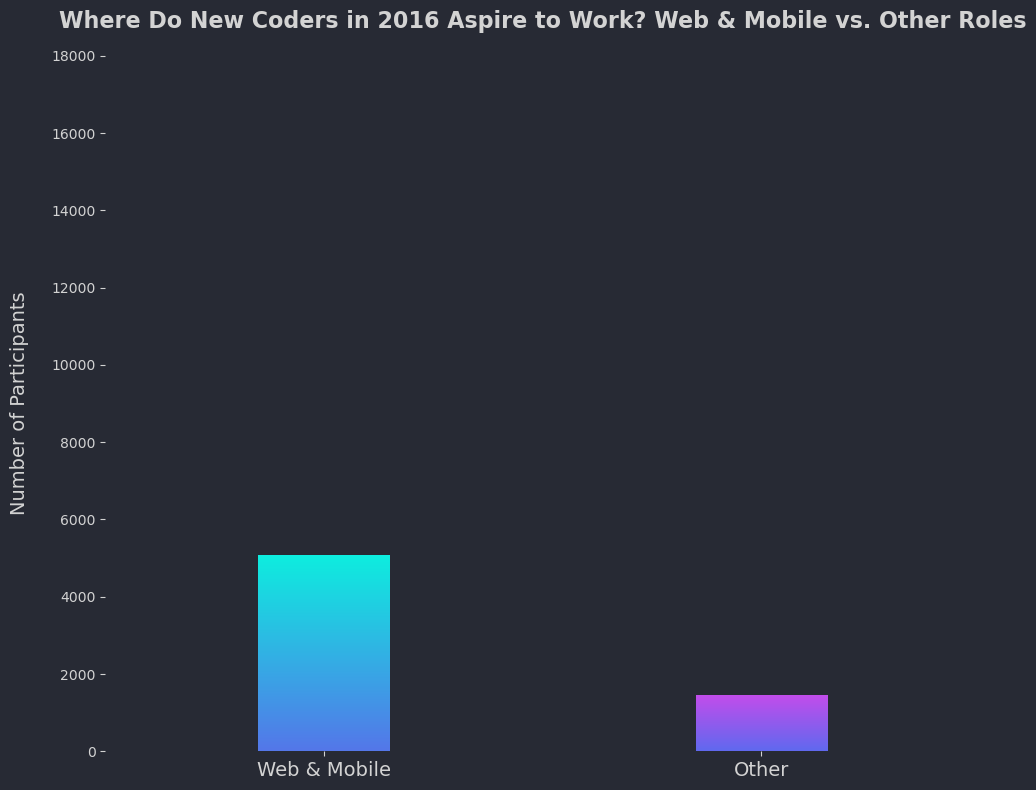

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def plot_web_mobile_vs_other(df, year):
    """
    This function creates a vertical bar plot comparing participants interested in web or mobile development roles
    with those interested in other roles.
    
    Parameters:
        df (pd.DataFrame): The dataset containing the roles_of_interest column.
        year (int): The survey year for labeling purposes.
    """
    
    # Define target roles
    target_roles = [
        'Front-End Web Developer', 'Back-End Web Developer', 'Full-Stack Web Developer', 
        'Mobile Developer', 'Front-End Developer', 'Back-End Developer'
    ]
    
    # Drop rows with missing roles_of_interest
    filtered_df = df.dropna(subset=['roles_of_interest']).copy()
    
    # Split roles_of_interest into lists and categorize
    filtered_df['roles_list'] = filtered_df['roles_of_interest'].str.split(',')
    filtered_df['roles_list'] = filtered_df['roles_list'].apply(lambda x: [role.strip() for role in x])
    
    # Categorize participants
    filtered_df['category'] = filtered_df['roles_list'].apply(
        lambda roles: 'Web & Mobile' if any(role in target_roles for role in roles) else 'Other'
    )
    
    # Count participants in each category
    counts = filtered_df['category'].value_counts().reset_index()
    counts.columns = ['Category', 'Count']
    counts = counts.sort_values(by='Category', ascending=False)

    # Function to create gradient-filled bars
    def gradient_bar(ax, x, y, color1, color2, width=0.3):
        for xi, yi in zip(x, y):
            gradient = np.linspace(0, 1, 256).reshape(-1, 1)  # Vertical gradient
            gradient_colors = LinearSegmentedColormap.from_list('gradient', [color1, color2])
            extent = [xi - width / 2, xi + width / 2, 0, yi]
            ax.imshow(gradient, aspect='auto', cmap=gradient_colors, extent=extent, zorder=2)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8), facecolor='#272A34')

    # Extract data
    x = np.arange(len(counts))
    y = counts['Count']

    # Gradient bar plot with appropriate colors
    if len(x) == 2:  # Ensure there are exactly two bars
        gradient_bar(ax, [x[0]], [y.iloc[0]], '#0EEDDF', '#5477E9')  # Gradient pink for 'Web & Mobile'
        gradient_bar(ax, [x[1]], [y.iloc[1]], '#C24DEB', '#6069EF')  # Gradient blue for 'Other'

    # Customize the plot
    ax.set_facecolor("#272A34")
    ax.set_title(f'Where Do New Coders in {year} Aspire to Work? Web & Mobile vs. Other Roles', 
                 fontsize=16, weight='bold', pad=20, color='lightgray')
    ax.set_xlabel('', fontsize=14, labelpad=14, color='lightgray')
    ax.set_ylabel('Number of Participants', fontsize=14, labelpad=16, color='lightgray')

    # Set tick labels and styles
    ax.set_xticks(x)
    ax.set_xticklabels(counts['Category'], fontsize=14, color='lightgray')
    ax.tick_params(colors='lightgray', which='both')
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(0, 18000)
    
    # Remove spines
    sns.despine(left=True, bottom=True, ax=ax)

    # Final layout adjustments
    plt.tight_layout()
    plt.show()

# Plot the 2016 survey data
plot_web_mobile_vs_other(df_2016_cleaned, 2016)

### **2016 Survey**
- **Full-Stack Web Developer** was the most popular role, attracting **39.54%** of respondents.  
- Front-End and Back-End Web Developers collectively accounted for **32.04%** of interest.  
- **Mobile Developer** was less popular, with **6.37%** of respondents.  
- Web-related roles dominated, comprising over **70%** of total interest.  

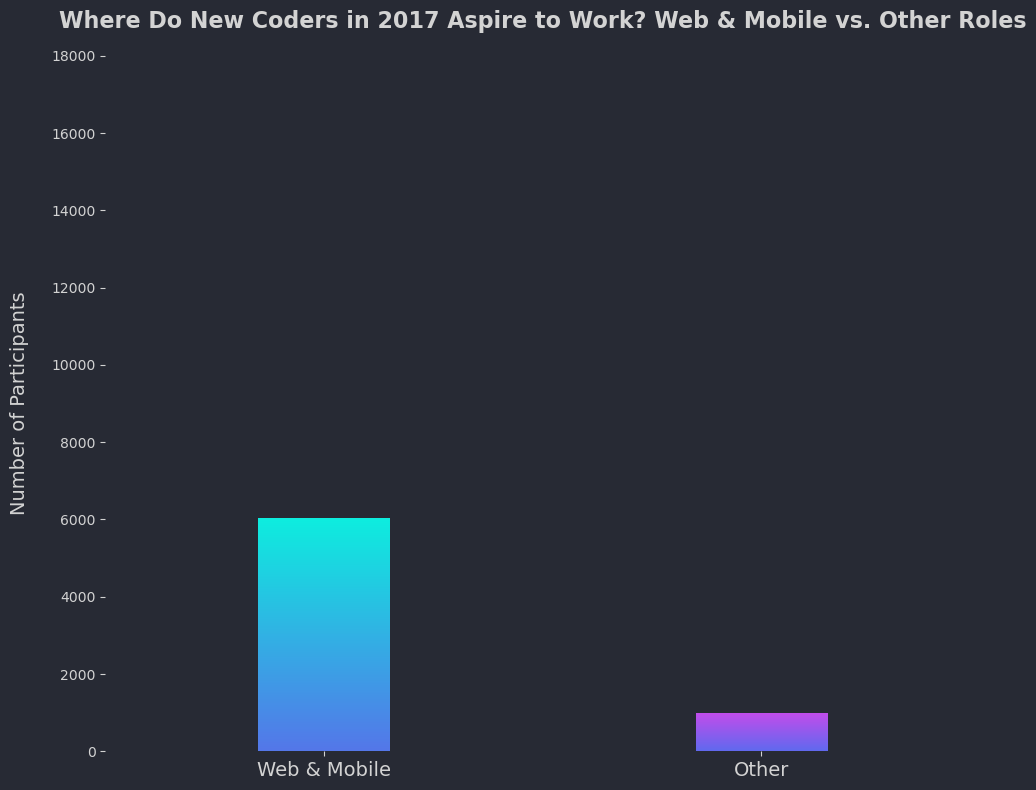

In [25]:
# Plot the 2017 survey data
plot_web_mobile_vs_other(df_2017_cleaned, 2017)

### **2017 Survey**
- Web development interest surged:  
  - Full-Stack Web Developer: **60.04%**  
  - Front-End Web Developer: **50.53%**  
  - Back-End Web Developer: **39.65%**  
- **Mobile Developer** interest rose sharply to **32.95%**, showing growing enthusiasm for mobile technology.  
- Combined interest in web and mobile development exceeded **90%**, underscoring their appeal.  

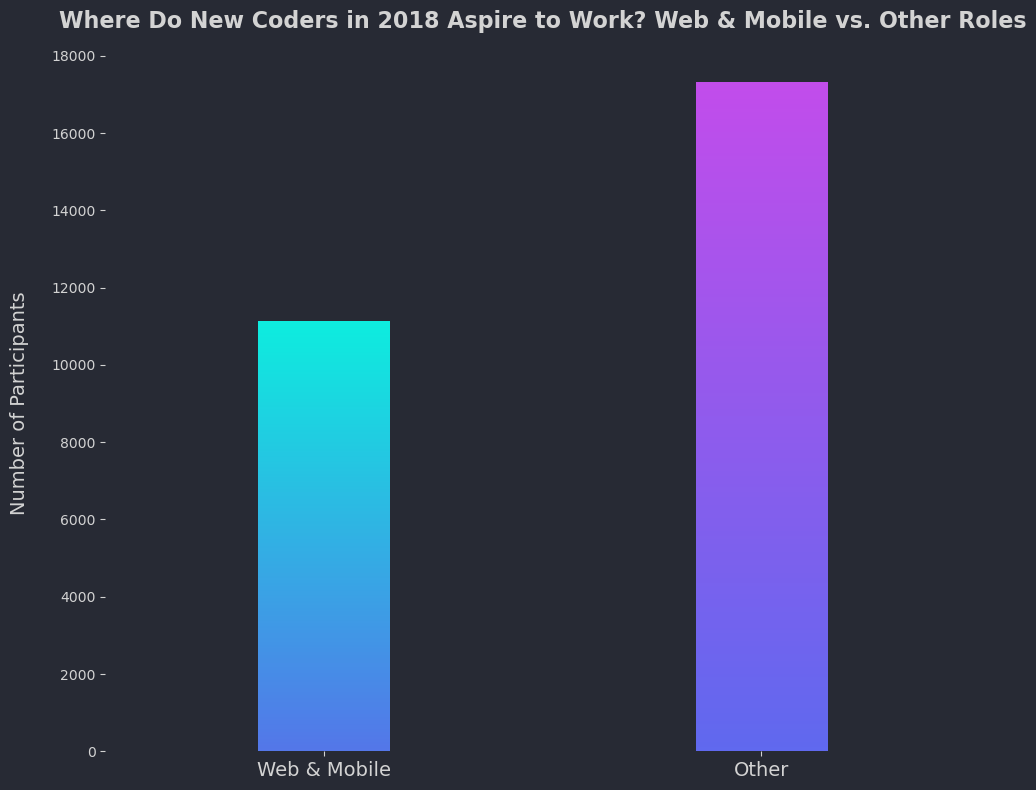

In [27]:
# Plot the 2018 survey data
plot_web_mobile_vs_other(df_2018_cleaned, 2018)

### **2018 Survey**
- Interest in Full-Stack Web Development dropped significantly to **25.80%**.  
- Front-End and Back-End Developer roles declined to **22.48%** and **17.53%**, respectively.  
- **Mobile Developer** interest fell slightly to **15.37%**, while new roles like Data Scientist (**12.47%**) and Game Developer (**12.40%**) gained traction.  

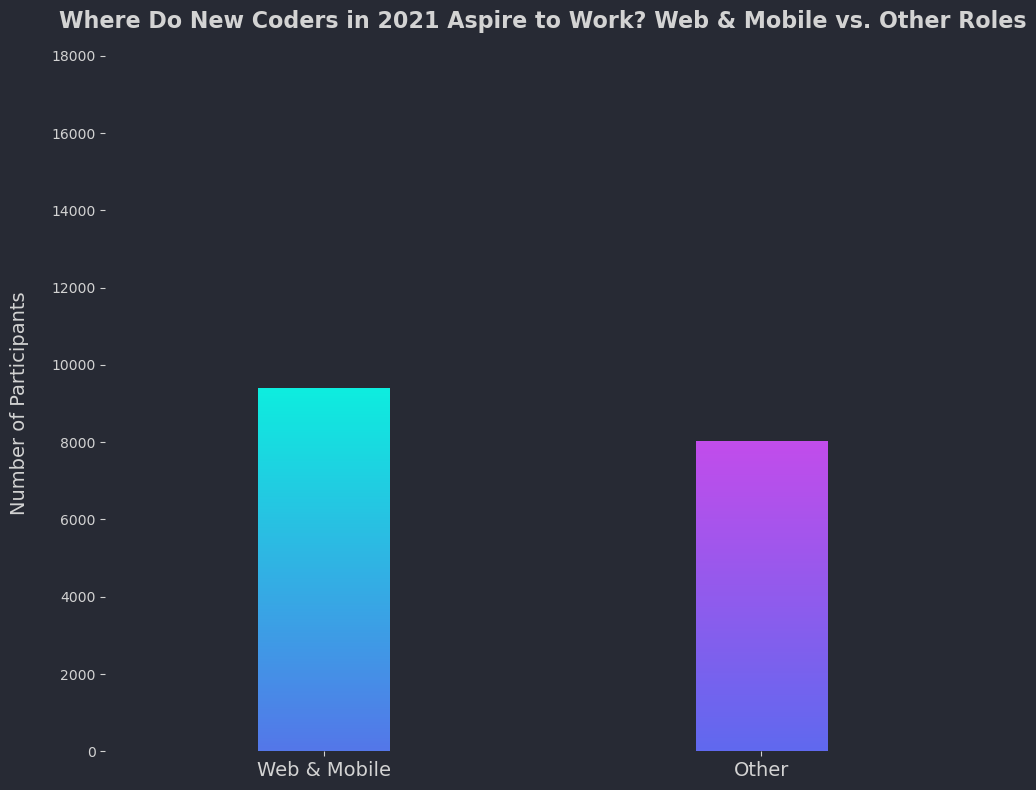

In [29]:
# Plot the 2021 survey data
plot_web_mobile_vs_other(df_2021_cleaned, 2021)

### **2021 Survey**
- Full-Stack Web Developer remained the top choice at **33.17%**, but Front-End (**11.87%**) and Back-End (**5.15%**) roles saw steep declines.  
- **Mobile Developer** interest dropped to a low of **3.74%**.  
- Roles like Data Scientist (**11.52%**) and Game Developer (**8.12%**) continued to grow in popularity.

---

### **Trends Over Time**

1. **Web Development Roles**:  
   - Interest peaked in 2017, with overlapping preferences for Full-Stack, Front-End, and Back-End roles exceeding **150%** combined.  
   - After 2017, interest declined, likely due to market saturation or shifting aspirations.  

2. **Mobile Development**:  
   - Interest rose to **32.95%** in 2017 but steadily declined, reaching just **3.74%** in 2021.  
   - This decline may reflect the increasing complexity of mobile ecosystems or changing coder priorities.  

3. **Diversification of Interests**:  
   - By 2018 and 2021, roles like Data Scientist, Game Developer, and Information Security Specialist gained popularity, showing a broadening of career paths.  

---

### **Summary**

From 2016 to 2021, web development roles dominated new coder interests but saw a decline after 2017. Mobile development followed a similar trajectory, peaking in 2017 before steadily dropping. Meanwhile, roles like Data Scientist and Game Developer gained prominence, reflecting a shift toward specialized career paths.  

These insights highlight the dynamic nature of the tech industry and provide guidance for educators, employers, and policymakers to adapt to the evolving interests of new coders.  

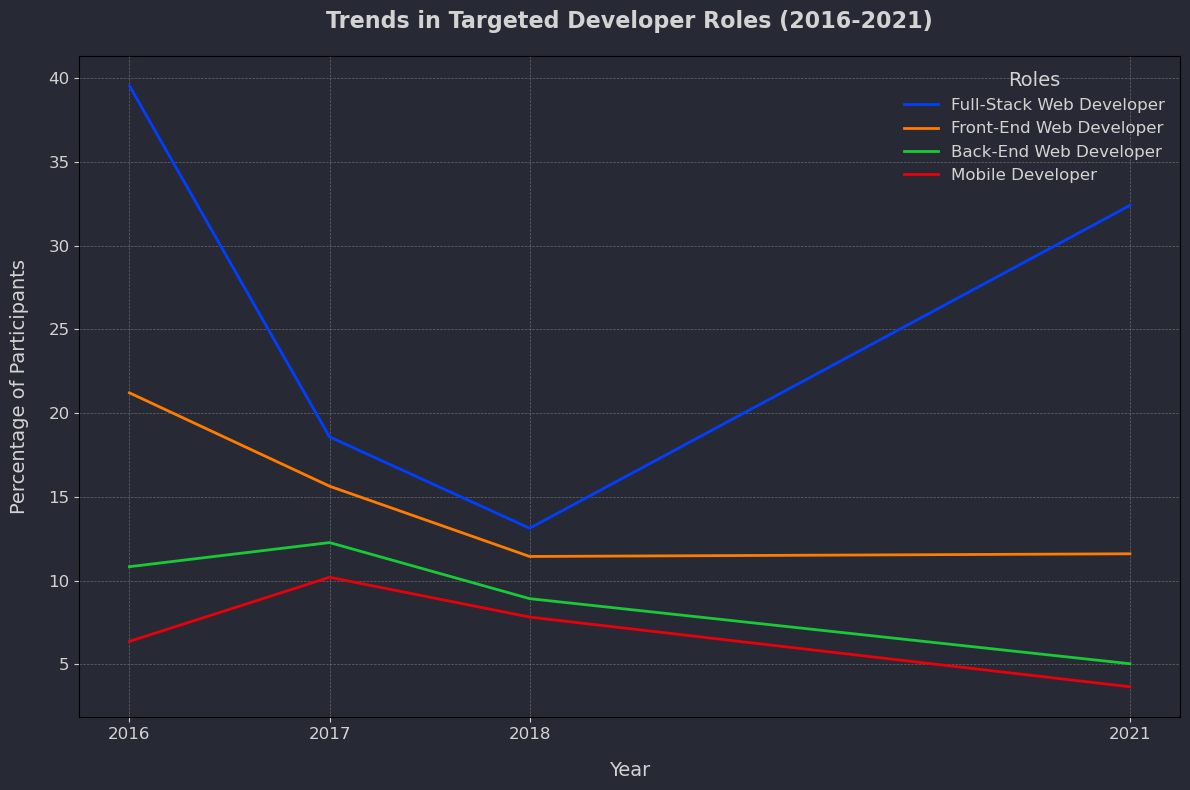

In [31]:
def calculate_role_percentages(df, year, target_roles):
    """
    Calculate the percentages of target roles as part of total roles picked by survey participants.

    Parameters:
        df (pd.DataFrame): The survey dataset containing the roles_of_interest column.
        year (int): The survey year for labeling purposes.
        target_roles (list): A list of roles to track.

    Returns:
        dict: A dictionary with roles as keys and percentages as values.
    """
    # --- Data Cleaning and Preparation ---
    # Drop rows where 'roles_of_interest' is missing to ensure data consistency
    filtered_df = df.dropna(subset=['roles_of_interest']).copy()

    # Split the 'roles_of_interest' column into lists of roles
    filtered_df['roles_list'] = filtered_df['roles_of_interest'].str.split(',')
    filtered_df['roles_list'] = filtered_df['roles_list'].apply(lambda x: [role.strip() for role in x])

    # --- Role Count and Percentage Calculation ---
    # Flatten the list of roles for all participants and count occurrences
    all_roles = [role for roles in filtered_df['roles_list'] for role in roles]
    total_roles = len(all_roles)  # Total number of roles across all participants

    # Count the number of times each role appears
    role_counts = pd.Series(all_roles).value_counts()

    # Calculate the percentage of each target role
    percentages = {
        role: (role_counts.get(role, 0) / total_roles) * 100 for role in target_roles
    }

    return percentages


def plot_role_trends(trend_data):
    """
    Plot a line graph representing the trends of target roles over the years.

    Parameters:
        trend_data (dict): A dictionary where keys are years and values are dictionaries of role percentages.
    """
    # --- Data Preparation for Plotting ---
    # Extract years and roles from the trend_data dictionary
    years = sorted(trend_data.keys())
    roles = list(next(iter(trend_data.values())).keys())  # Get roles from the first year

    # Create a 'bright' color palette for clear role differentiation
    palette = sns.color_palette("bright", len(roles))

    # --- Plot Initialization ---
    fig, ax = plt.subplots(figsize=(12, 8), facecolor="#272A34")  # Set up figure with dark background

    # --- Plot Trends for Each Role ---
    for role, color in zip(roles, palette):
        # Extract role percentages for all years
        role_trend = [trend_data[year].get(role, 0) for year in years]
        ax.plot(years, role_trend, label=role, color=color, linewidth=2)

    # --- Customize Plot Appearance ---
    ax.set_facecolor("#272A34")  # Set the plot background color
    ax.set_title("Trends in Targeted Developer Roles (2016-2021)", fontsize=16, weight='bold', pad=20, color='lightgray')
    ax.set_xlabel("Year", fontsize=14, labelpad=14, color='lightgray')
    ax.set_ylabel("Percentage of Participants", fontsize=14, labelpad=14, color='lightgray')
    ax.set_xticks(years)  # Set year ticks explicitly
    ax.tick_params(axis='both', labelsize=12, colors='lightgray')  # Style tick labels
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add light gridlines for readability
    ax.legend(title="Roles", fontsize=12, title_fontsize=14, loc='upper right', frameon=False, labelcolor='lightgray')  
    ax.get_legend().get_title().set_color('lightgray')  # Style legend title

    # --- Finalize and Show Plot ---
    fig.tight_layout()  # Ensure all elements fit within the figure
    plt.show()


# --- Define Survey Datasets and Roles ---
# Dictionary mapping survey years to cleaned DataFrames
survey_data = {
    2016: df_2016_cleaned,
    2017: df_2017_cleaned,
    2018: df_2018_cleaned,
    2021: df_2021_cleaned
}

# List of developer roles to analyze
target_roles = [
    'Full-Stack Web Developer',
    'Front-End Web Developer',
    'Back-End Web Developer',
    'Mobile Developer'
]

# --- Calculate Trends Over Years ---
trend_data = {}  # Initialize dictionary to store yearly trends
for year, df in survey_data.items():
    trend_data[year] = calculate_role_percentages(df, year, target_roles)

# --- Plot the Trends ---
plot_role_trends(trend_data)

## Analysis of Developer Role Trends (2016–2021)

### Overview
This analysis explores trends in the popularity of four developer roles—**Full-Stack Web Developer**, **Front-End Web Developer**, **Back-End Web Developer**, and **Mobile Developer**—from 2016 to 2021. Insights are based on survey data to guide our e-learning company in identifying growth opportunities and refining market strategies.

---

### Key Findings

#### **1. Full-Stack Web Developer**
- **2016**: Led with **39.54%** interest among participants.  
- **2017–2018**: Declined to **18.58%** (2017) and **13.12%** (2018).  
- **2021**: Rebounded to **32.40%**, indicating renewed interest in versatile developers.

**Implication**: Full-Stack Development remains critical. The resurgence in 2021 highlights strong demand for comprehensive skills. Expanding courses on frameworks like React, Node.js, and Django could attract a broader audience.

---

#### **2. Front-End Web Developer**
- **2016**: Captured **21.21%** interest.  
- **2017–2018**: Declined to **15.63%** (2017) and **11.44%** (2018).  
- **2021**: Stagnated at **11.60%**, showing minimal growth.

**Implication**: Front-End roles remain essential, but the plateau suggests a stable market. Introducing advanced content in modern JavaScript, UI/UX design, and performance optimization could differentiate our offerings.

---

#### **3. Back-End Web Developer**
- **2016**: Represented **10.83%** of interest.  
- **2017–2018**: Declined to **12.27%** (2017) and **8.92%** (2018).  
- **2021**: Dropped further to **5.03%**, making it the least popular web development role.

**Implication**: Standalone Back-End roles are declining, likely due to the rise of Full-Stack Development. Integrating Back-End content into Full-Stack courses could better align with current trends.

---

#### **4. Mobile Developer**
- **2016**: Accounted for **6.37%** interest, the lowest among roles.  
- **2017–2018**: Grew to **10.19%** (2017) but dropped to **7.82%** (2018).  
- **2021**: Declined further to **3.66%**, showing consistent decline.

**Implication**: Mobile Development's decreasing appeal may result from market saturation or a shift toward web technologies. Targeting niche areas like Flutter or Swift for iOS could reinvigorate interest.

---

### Strategic Recommendations
1. **Prioritize Full-Stack Development**: Focus on beginner-to-advanced courses covering client-side and server-side technologies.  
2. **Enhance Front-End Content**: Include UI/UX design and performance optimization to add value.  
3. **Repackage Back-End Skills**: Combine Back-End development into Full-Stack curricula to reflect market preferences.  
4. **Refine Mobile Offerings**: Concentrate on efficient, niche tools like cross-platform frameworks to attract specific audiences.

---

### Summary
While some roles, like Mobile Developer and Back-End Developer, have declined, Full-Stack Development shows strong potential for growth. By tailoring our course offerings to align with these trends, we can better serve our learners and capitalize on emerging opportunities in the e-learning market.

## Targeting the Best Countries for Advertising Coding Products

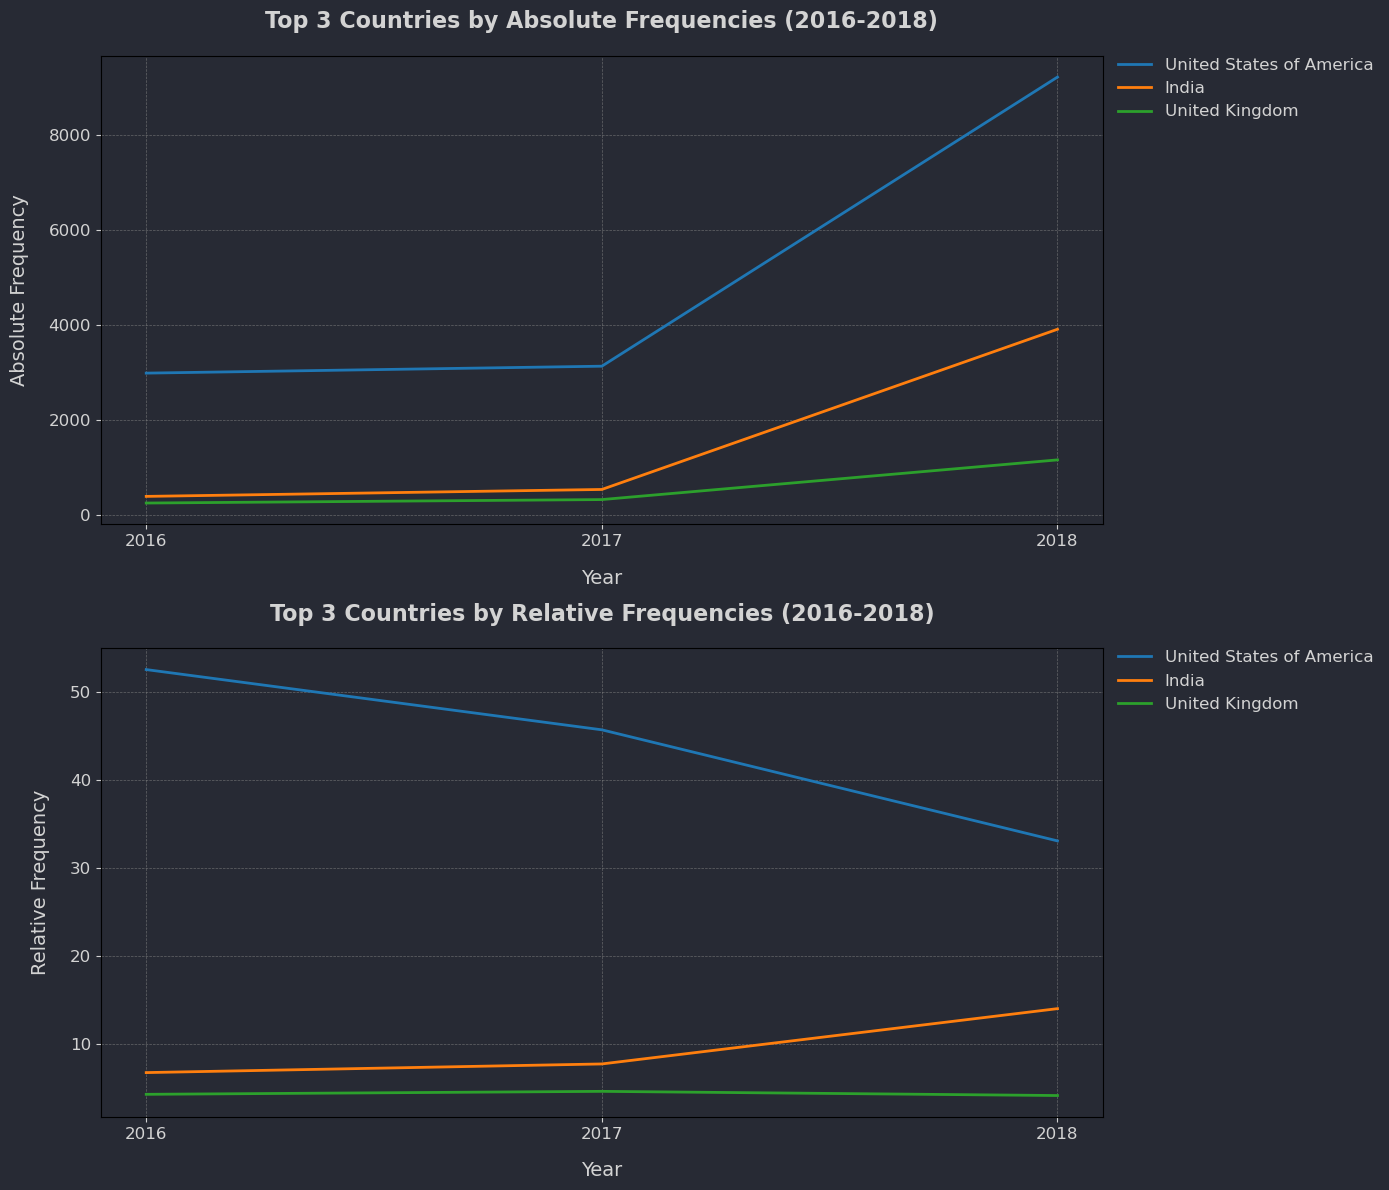

In [34]:
def generate_country_frequency_table(df):
    """
    Generate absolute and relative frequency tables for the `country_live` column.

    Parameters:
        df (pd.DataFrame): The dataset to analyze.

    Returns:
        pd.DataFrame: A DataFrame with absolute and relative frequencies for each country.
    """
    # Drop rows with missing roles_of_interest
    df_filtered = df.dropna(subset=['roles_of_interest'])

    # Calculate absolute frequencies
    absolute_frequencies = df_filtered['country_live'].value_counts()

    # Calculate relative frequencies
    relative_frequencies = df_filtered['country_live'].value_counts(normalize=True) * 100

    # Combine into a single DataFrame
    frequency_table = pd.DataFrame({
        'Absolute Frequency': absolute_frequencies,
        'Relative Frequency (%)': relative_frequencies
    })

    return frequency_table

# Generating country frequency table for each dataset
country_freq_2016 = generate_country_frequency_table(df_2016_cleaned)
country_freq_2017 = generate_country_frequency_table(df_2017_cleaned)
country_freq_2018 = generate_country_frequency_table(df_2018_cleaned)
country_freq_2021 = generate_country_frequency_table(df_2021_cleaned)

def plot_country_distributions(freq_data):
    """
    Plot the top 3 countries based on absolute and relative frequencies across years.

    Parameters:
        freq_data (dict): A dictionary where keys are years and values are DataFrames
                          with frequency data (absolute and relative).
    """
    # Prepare data for plotting
    years = sorted(freq_data.keys())
    top_countries_abs = {year: df.nlargest(3, 'Absolute Frequency') for year, df in freq_data.items()}
    top_countries_rel = {year: df.nlargest(3, 'Relative Frequency (%)') for year, df in freq_data.items()}

    # Flatten data for seaborn plotting
    abs_data = []
    rel_data = []
    for year in years:
        for country, row in top_countries_abs[year].iterrows():
            abs_data.append({'Year': year, 'Country': country, 'Frequency': row['Absolute Frequency']})
        for country, row in top_countries_rel[year].iterrows():
            rel_data.append({'Year': year, 'Country': country, 'Frequency (%)': row['Relative Frequency (%)']})

    abs_df = pd.DataFrame(abs_data)
    rel_df = pd.DataFrame(rel_data)

    # Create a seaborn color palette
    palette = sns.color_palette("tab10", n_colors=3)

    # Initialize the figure and subplots
    fig, axs = plt.subplots(2, 1, figsize=(14, 12), facecolor="#272A34")

    # Plot absolute frequencies
    sns.lineplot(
        data=abs_df,
        x='Year',
        y='Frequency',
        hue='Country',
        palette=palette,
        ax=axs[0],
        linewidth=2
    )
    axs[0].set_title('Top 3 Countries by Absolute Frequencies (2016-2018)', fontsize=16, weight='bold', color='lightgray', pad=20)
    axs[0].set_facecolor("#272A34")
    axs[0].set_xlabel("Year", fontsize=14, labelpad=14, color='lightgray')
    axs[0].set_ylabel("Absolute Frequency", fontsize=14, labelpad=14, color='lightgray')
    axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    axs[0].set_xticks([2016, 2017, 2018])
    axs[0].tick_params(axis='both', labelsize=12, colors='lightgray', labelcolor='lightgray')
    axs[0].legend(labelcolor='lightgray', fontsize=12, title_fontsize=14, loc='center left', frameon=False, bbox_to_anchor=(1, .93))

    # Plot relative frequencies10
    sns.lineplot(
        data=rel_df,
        x='Year',
        y='Frequency (%)',
        hue='Country',
        palette=palette,
        ax=axs[1],
        linewidth=2
    )
    axs[1].set_title('Top 3 Countries by Relative Frequencies (2016-2018)', fontsize=16, weight='bold', color='lightgray', pad=20)
    axs[1].set_facecolor("#272A34")
    axs[1].set_xlabel("Year", fontsize=14, labelpad=14, color='lightgray')
    axs[1].set_ylabel("Relative Frequency", fontsize=14, labelpad=14, color='lightgray')
    axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    axs[1].set_xticks([2016, 2017, 2018])
    axs[1].tick_params(axis='both', labelsize=12, colors='lightgray', labelcolor='lightgray')
    axs[1].legend(labelcolor='lightgray', fontsize=12, title_fontsize=14, loc='center left', frameon=False, bbox_to_anchor=(1, .93))

    # Tighten layout and show
    fig.tight_layout()
    plt.show()

freq_tables = {
    2016: country_freq_2016,
    2017: country_freq_2017,
    2018: country_freq_2018
}

plot_country_distributions(freq_tables)

## Analysis of Country Frequencies (2016–2018)

### Overview
This analysis focuses on the top three countries by absolute and relative frequencies from survey data collected in 2016, 2017, and 2018. The 2021 data was excluded due to its use of regional groupings, which are unsuitable for country-specific analysis.

---

### Key Observations

#### **Absolute Frequencies**
1. **United States of America**:  
   - Consistently ranks first with the highest absolute frequencies, increasing from **2,979** in 2016 to **9,216** in 2018.  

2. **India**:  
   - Ranked second in 2017 and 2018, with absolute frequencies nearly doubling from **382** in 2016 to **3,903** in 2018. This indicates growing participation and interest in coding fields.  

3. **United Kingdom**:  
   - Holds third place across all years, with slower growth compared to India, rising from **242** in 2016 to **1,151** in 2018.  

#### **Relative Frequencies (%)**
1. **United States of America**:  
   - While leading in absolute numbers, its share of total respondents decreases, from **52.55%** in 2016 to **33.08%** in 2018, due to increasing global participation.  

2. **India**:  
   - Shows a significant rise in relative frequency, from **6.74%** in 2016 to **14.01%** in 2018, reflecting growing influence in the tech sector.  

3. **United Kingdom**:  
   - Remains stable, with minor fluctuations between **4.27%** in 2016 and **4.13%** in 2018.  

---

### Recommended Markets for Advertisement
1. **United States of America**:  
   As the country with the largest absolute frequency of participants, the USA is an ideal market for advertising due to its consistent size and engagement.  

2. **India**:  
   India’s rapid growth in both absolute and relative frequencies makes it a high-potential market. Its increasing number of participants reflects a strong and growing interest in coding education.  

In [36]:
df_2017_cleaned[df_2017_cleaned['roles_of_interest'].isnull() & df_2017_cleaned['country_live'].isnull()].shape

(2685, 4)

In [37]:
df_2017_cleaned.isnull().sum()

country_live           2839
money_for_learning     1598
roles_of_interest     11183
months_programming     1091
dtype: int64

In [38]:
df_2016_cleaned[df_2016_cleaned['roles_of_interest'].isnull()]['money_for_learning'].value_counts(bins=10)

(-120.001, 12000.0]     8353
(12000.0, 24000.0]       160
(24000.0, 36000.0]        18
(72000.0, 84000.0]         4
(96000.0, 108000.0]        4
(36000.0, 48000.0]         3
(48000.0, 60000.0]         3
(60000.0, 72000.0]         2
(84000.0, 96000.0]         1
(108000.0, 120000.0]       1
Name: count, dtype: int64

In [39]:
df_2016_cleaned[df_2016_cleaned['roles_of_interest'].notnull()]['money_for_learning'].value_counts(bins=10)

(-180.001, 18000.0]     6057
(18000.0, 36000.0]        56
(36000.0, 54000.0]        10
(54000.0, 72000.0]         3
(90000.0, 108000.0]        2
(108000.0, 126000.0]       1
(162000.0, 180000.0]       1
(72000.0, 90000.0]         0
(126000.0, 144000.0]       0
(144000.0, 162000.0]       0
Name: count, dtype: int64

## Analysis of Money Spent for Learning

In [41]:
def process_dataset(df, countries_of_interest):
    """
    Processes a dataset to calculate money_per_month and filter by specified countries.
    """
    
    # Replace 0 with 1 in 'months_programming' to avoid division by zero
    df["months_programming"] = pd.to_numeric(df["months_programming"], errors="coerce")
    df["months_programming"] = df["months_programming"].replace(0, 1)
    
    # Convert 'money_for_learning' to numeric for calculations
    df["money_for_learning"] = pd.to_numeric(df["money_for_learning"], errors="coerce")
    
    # Calculate 'money_per_month'
    df["money_per_month"] = round((df["money_for_learning"] / df["months_programming"]), 2)
    
    # Filter for the specified countries
    df_filtered = df[df["country_live"].isin(countries_of_interest)]

    # Drop the rows with a value 0 in the 'money_per_month' column
    df_filtered = df_filtered.dropna(subset=["money_per_month"])
    df_filtered = df_filtered.loc[df_filtered["money_per_month"] > 0]

    return df_filtered

# List of countries to filter by
countries_of_interest = ["United States of America", "India", "United Kingdom", "Canada"]

# Apply the function to all datasets
df_2016_processed = process_dataset(df_2016_cleaned, countries_of_interest)
df_2017_processed = process_dataset(df_2017_cleaned, countries_of_interest)
df_2018_processed = process_dataset(df_2018_cleaned, countries_of_interest)

In [42]:
df_2016_processed.head()

,country_live,money_for_learning,roles_of_interest,months_programming,money_per_month
1,United States of America,20.0,Front-End Web Developer,2.0,10.00
2,United States of America,50.0,NaN,24.0,2.08
3,United States of America,100.0,Front-End Web Developer,3.0,33.33
4,United States of America,1300.0,Full-Stack Web Developer,48.0,27.08
8,United States of America,3000.0,NaN,24.0,125.00


In [43]:
df_2017_processed.head()

,country_live,money_for_learning,roles_of_interest,months_programming,money_per_month
0,Canada,150.0,NaN,6.0,25.00
1,United States of America,80.0,Full-Stack Web Developer,6.0,13.33
2,United States of America,1000.0,"Front-End Web Developer, Back-End Web Develo...",5.0,200.00
5,Canada,200.0,NaN,12.0,16.67
8,United States of America,700.0,NaN,29.0,24.14


In [44]:
df_2018_processed.head()

,country_live,money_for_learning,roles_of_interest,months_programming,money_per_month
0,United States of America,500.0,,8,62.50
7,India,80.0,"Mobile Developer, Data Scientist, Information ...",12,6.67
9,United States of America,200.0,"Full-Stack Web Developer, Back-End Web Develop...",24,8.33
14,Canada,400.0,,3,133.33
17,United States of America,30.0,,10,3.00


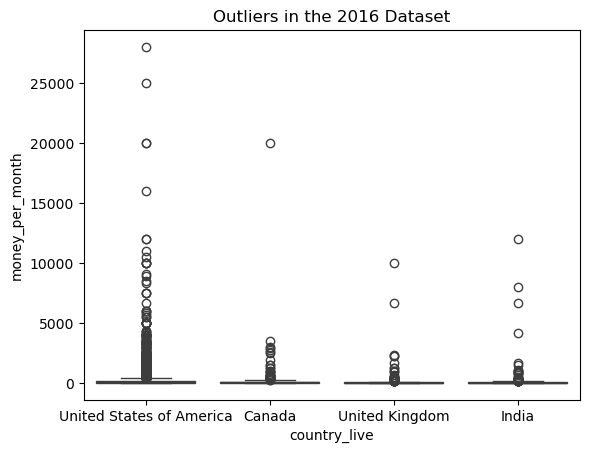

In [45]:
sns.boxplot(x='country_live', y='money_per_month', hue='country_live', data=df_2016_processed,)
plt.title('Outliers in the 2016 Dataset')
plt.show()

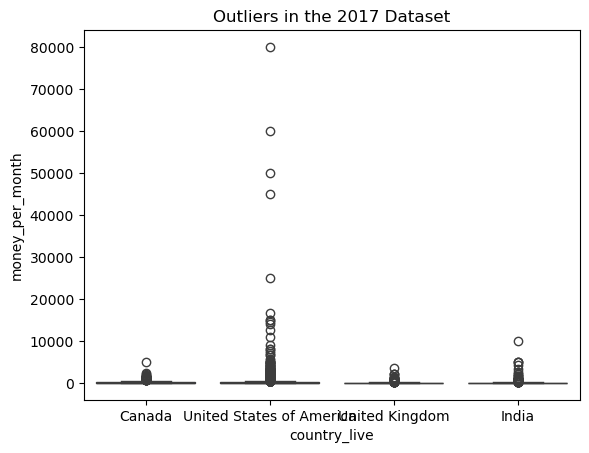

In [46]:
sns.boxplot(x='country_live', y='money_per_month', hue='country_live', data=df_2017_processed)
plt.title('Outliers in the 2017 Dataset')
plt.show()

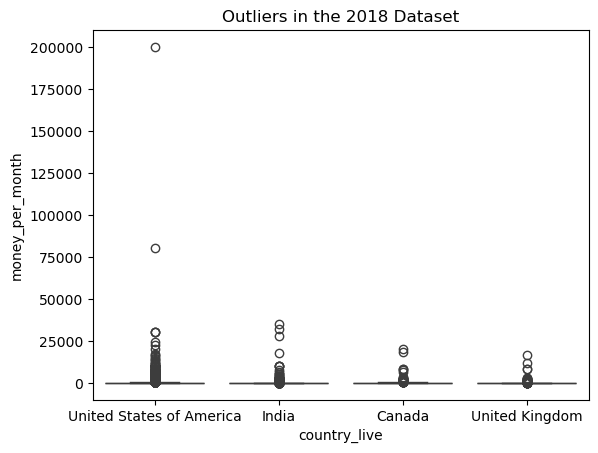

In [47]:
sns.boxplot(x='country_live', y='money_per_month', hue='country_live', data=df_2018_processed)
plt.title('Outliers in the 2018 Dataset')
plt.show()

In [48]:
def remove_outliers(df, column, upper_percentile=95):
    """
    Removes outliers based on specified percentile.
    
    Parameters:
        df (DataFrame): The input data frame.
        column (str): Column for which to remove outliers.
        upper_percentile (float): Upper percentile cutoff.
        
    Returns:
        DataFrame: A data frame with outliers removed.
    """
    upper_bound = df[column].quantile(upper_percentile / 100)
    
    # Filter data
    df_filtered = df[df[column] <= upper_bound]
    return df_filtered

# Apply the function to remove outliers
df_2016_without_outliers = remove_outliers(df_2016_processed, "money_per_month")
df_2017_without_outliers = remove_outliers(df_2017_processed, "money_per_month")
df_2018_without_outliers = remove_outliers(df_2018_processed, "money_per_month")

def calculate_stats(df):
    """
    Groups the dataset by 'country_live' and calculates the mean, median, and mode
    of 'money_per_month' for each country.
    """
    
    grouped = df.groupby("country_live")["money_per_month"].agg(
        mean="mean",
        median="median",
        mode=lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    )
    return grouped.reset_index()

# Calculate stats for each year
df_2016_stats = calculate_stats(df_2016_without_outliers)
df_2017_stats = calculate_stats(df_2017_without_outliers)
df_2018_stats = calculate_stats(df_2018_without_outliers)

# Display the stats results
print("2016 Stats:")
print(df_2016_stats)
print("\n2017 Stats:")
print(df_2017_stats)
print("\n2018 Stats:")
print(df_2018_stats)

2016 Stats:
               country_live        mean  median   mode
0                    Canada   92.193206   22.22  16.67
1                     India   64.721335   13.61   8.33
2            United Kingdom   65.224677   16.67  16.67
3  United States of America  136.569672   28.87  16.67

2017 Stats:
               country_live        mean  median   mode
0                    Canada  145.806354   25.00  25.00
1                     India   70.783411   12.50   8.33
2            United Kingdom   67.542117   16.67   8.33
3  United States of America  121.784727   25.00  16.67

2018 Stats:
               country_live        mean  median   mode
0                    Canada  114.830896   25.00   8.33
1                     India   63.869372   12.50   8.33
2            United Kingdom   74.452159   16.67  10.00
3  United States of America  105.931495   27.78  50.00


### Analysis of Final Stats Results by Country
---
- **Canada**:  
  - The mean fluctuates, with 2017 showing a high of **145.81**, suggesting increased spending that year.  
  - The median remains consistent around **25.00**, and the mode varies, reflecting diverse spending patterns.  

- **India**:  
  - Spending is consistently lower, with means around **63–71** and medians close to **12.50**.  
  - The mode is stable at **8.33**, indicating modest spending by most learners.  

- **United Kingdom**:  
  - Mean spending is relatively stable at **65–75**, with medians near **16.67**.  
  - The mode shows slight shifts between years, suggesting minor changes in spending habits.  

- **United States of America**:  
  - The US has the highest mean spending, averaging **120–136** in 2016–2017, but dropping to **105.93** in 2018.  
  - Median values remain consistent (**25–28.87**), while the mode shifts from **16.67** to **50.00** in 2018, indicating emerging spending patterns.

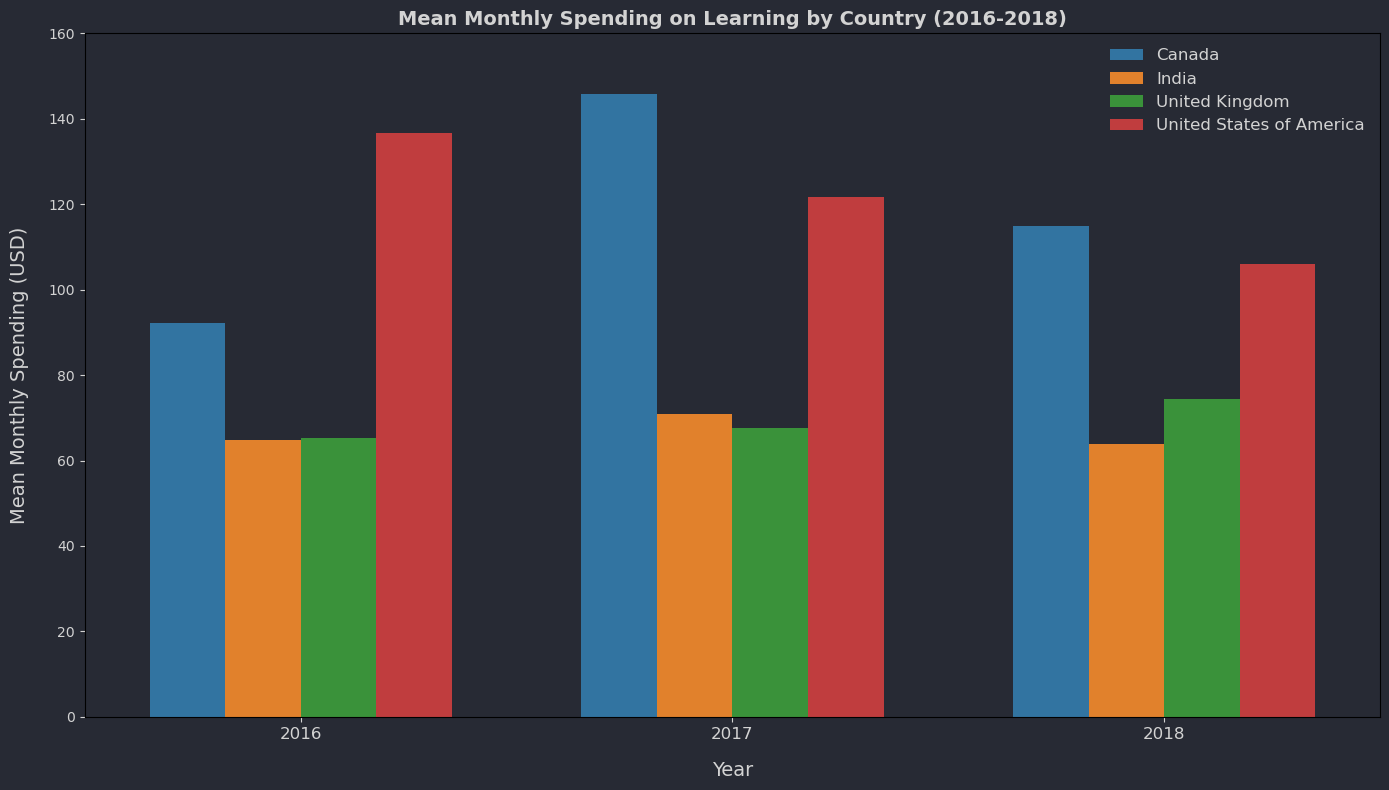

In [50]:
# Add a 'Year' column to each stats DataFrame
df_2016_stats['Year'] = 2016
df_2017_stats['Year'] = 2017
df_2018_stats['Year'] = 2018

# Concatenate all years into a single DataFrame
df_all_stats = pd.concat([df_2016_stats, df_2017_stats, df_2018_stats])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8), facecolor="#272A34")

# Create the grouped bar plot
sns.barplot(
    data=df_all_stats, 
    x="Year", 
    y="mean", 
    hue="country_live", 
    palette="tab10",
    width=.7,
    ax=ax  # Specify the axis
)

# Customize the plot
ax.set_title("Mean Monthly Spending on Learning by Country (2016-2018)", fontsize=14, weight='bold', color="lightgray")
ax.set_facecolor("#272A34")
ax.set_xlabel("Year", fontsize=14, labelpad=14, color="lightgray")
ax.set_ylabel("Mean Monthly Spending (USD)", fontsize=14, labelpad=14, color="lightgray")
ax.legend(labelcolor='lightgray', fontsize=12, frameon=False)
ax.tick_params(axis='x', colors="lightgray", labelsize=12)
ax.tick_params(axis='y', colors="lightgray")
ax.set_ylim(0, 160)

# Remove grid lines
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

# Final Recommendations for Advertisement Strategy
---

## Summary of Findings

### Key Data Insights:
1. **Subscription Price**: \$59 per month.  
2. **Potential Customers by Country**:  
   - **United States**: Largest customer base and high spending on learning.  
   - **India**: Large customer base, but average spending is much lower than \$59.  
   - **United Kingdom**: Moderate customer base with spending near \$59.  
   - **Canada**: Smaller base but high average spending.  

3. **Monthly Spending on Learning**:  
   - **United States**: Mean spending consistently exceeds $100, indicating strong willingness to pay.  
   - **India**: Mean spending below \$70, highlighting price sensitivity.  
   - **United Kingdom**: Mean spending around \$70, close to the subscription price.  
   - **Canada**: Mean spending often above \$100, similar to the US.  

---

## Recommendations

### Best Countries to Advertise In
- **Focus on the United States and Canada**:  
  - Both countries have high average spending, with the US offering the largest customer base and Canada representing a valuable secondary market.  

### Should We Advertise in More Than Two Countries?  
- **No**:  
  - The **UK** offers limited profit margins with spending near $59.  
  - **India** requires localized pricing due to significantly lower spending, making it less feasible for this strategy.  

### Should We Split the Advertising Budget Unequally?  
- **Yes**:  
  - Allocate **60-70%** to the US for its large, high-spending customer base.  
  - Assign **30-40%** to Canada to capture its high-value market.  

### Should We Advertise in the US Only?  
- **No**:  
  - Canada’s high spending offers a valuable opportunity, diversifying risk and increasing revenue potential.  

### Should We Let the Marketing Team Decide?  
- **Yes**:  
  - Provide the marketing team with data-driven insights to guide their decisions.  
  - Their expertise can refine strategies and adapt them to broader industry trends.  

---

## Final Recommendation
Prioritize advertising in the **United States and Canada**, with a larger budget allocation to the US. Avoid expanding to additional markets like the UK or India for this campaign. Collaborate closely with the marketing team to ensure strategies are both data-driven and creatively optimized for success.  

# Conclusion

This project aimed to determine the most effective countries to advertise a $59-per-month subscription for learning resources. The analysis focused on four key markets - United States, Canada, United Kingdom, and India - by evaluating their potential customer base and average monthly spending on learning resources. Key metrics such as mean, median, and mode were calculated after removing outliers to ensure accurate and reliable insights for the period 2016–2018.

The results indicate that the United States and Canada offer the highest potential for profitable advertising, with average monthly spending significantly exceeding the subscription price. While the United Kingdom and India show potential, their spending patterns may require tailored pricing strategies to ensure profitability. These findings provide a clear roadmap for prioritizing advertising efforts and optimizing resource allocation to maximize returns.